<a href="https://colab.research.google.com/github/NazraJN/Suicide_rates/blob/main/Suicide_rates_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suicide rates analysis

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# load the datasets
female_suicide_rates = pd.read_csv('Age_adjusted_female_suicide_rates.csv')
male_suicide_rates = pd.read_csv('Age_adjusted_male_suicide_rates.csv')

In [3]:
with open('datapackage.json') as f:
   data = json.load(f)
data

{'name': 'Age-adjusted male suicide rates, 1950-2005 - WHO (2005)',
 'title': 'Age-adjusted male suicide rates, 1950-2005 - WHO (2005)',
 'id': 21,
 'description': 'Age-adjusted suicide rates',
 'sources': [{'name': 'World Health Organization (2005)',
   'dataPublishedBy': 'Gapminder using data from (i) WHO Violence and Injury Prevention (VIP) and (ii) WHO Global Burden of Disease 2002 and 2004.',
   'dataPublisherSource': None,
   'link': 'http://spreadsheets.google.com/pub?key=troMumuI0Y6Phpwnj6qXa_A&output=xls',
   'retrievedDate': None,
   'additionalInfo': 'Age-adjusted suicide rates'}],
 'owidTags': ['Suicides'],
 'resources': [{'path': 'Age-adjusted male suicide rates, 1950-2005 - WHO (2005).csv',
   'schema': {'fields': [{'name': 'Entity', 'type': 'string'},
     {'name': 'Year', 'type': 'year'},
     {'name': 'Male suicide rates for selected countries, 1950-2005 (WHO (2005))',
      'type': 'any',
      'description': '',
      'owidDisplaySettings': {'unit': 'age-adjusted mal

## Female suicide rates

In [4]:
# preview first 10 columns
female_suicide_rates.head(10)

,Entity,Year,"Female suicide rates for selected countries, 1950-2005 (WHO (2015))",Female suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156,8.630156
1,Albania,2004,6.060875,6.060875
2,Algeria,2004,4.600765,4.600765
3,Andorra,2004,2.902797,2.902797
4,Angola,2004,8.143820,8.143820
5,Argentina,1966,3.773803,3.773803
6,Argentina,1967,4.522207,4.522207
7,Argentina,1968,4.950262,4.950262
8,Argentina,1969,4.472790,4.472790
9,Argentina,1970,5.086274,5.086274


In [5]:
# preview last 10 columns
female_suicide_rates.tail(10)

,Entity,Year,"Female suicide rates for selected countries, 1950-2005 (WHO (2015))",Female suicide rate (WHO (2005))
2494,Yugoslavia,1983,NaN,8.625981
2495,Yugoslavia,1984,NaN,8.548234
2496,Yugoslavia,1985,NaN,8.234728
2497,Yugoslavia,1986,NaN,8.317180
2498,Yugoslavia,1987,NaN,9.230215
2499,Yugoslavia,1988,NaN,8.753218
2500,Yugoslavia,1989,NaN,8.518538
2501,Yugoslavia,1990,NaN,7.793037
2502,Zambia,2004,NaN,7.959891
2503,Zimbabwe,2004,NaN,9.376059


In [6]:
# check column features
female_suicide_rates.columns

Index(['Entity', 'Year',
       'Female suicide rates for selected countries, 1950-2005 (WHO (2015))',
       'Female suicide rate (WHO (2005))'],
      dtype='object')

In [7]:
# concise summary of the dataset
female_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 4 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Entity                                                               2504 non-null   object 
 1   Year                                                                 2504 non-null   int64  
 2   Female suicide rates for selected countries, 1950-2005 (WHO (2015))  996 non-null    float64
 3   Female suicide rate (WHO (2005))                                     2504 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 78.4+ KB


In [8]:
# check for total missing values in each column
female_suicide_rates.isna().sum()

Entity                                                                    0
Year                                                                      0
Female suicide rates for selected countries, 1950-2005 (WHO (2015))    1508
Female suicide rate (WHO (2005))                                          0
dtype: int64

In [9]:
# Drop the columns with missing values
female_suicide_rates = female_suicide_rates.drop(columns=['Female suicide rates for selected countries, 1950-2005 (WHO (2015))'])
female_suicide_rates

,Entity,Year,Female suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156
1,Albania,2004,6.060875
2,Algeria,2004,4.600765
3,Andorra,2004,2.902797
4,Angola,2004,8.143820
...,...,...,...
2499,Yugoslavia,1988,8.753218
2500,Yugoslavia,1989,8.518538
2501,Yugoslavia,1990,7.793037
2502,Zambia,2004,7.959891


In [10]:
# summary statistics of the dataset
female_suicide_rates.drop('Year', axis=1).describe()

,Female suicide rate (WHO (2005))
count,2504.000000
mean,6.170119
std,4.107957
min,0.024492
25%,3.028061
50%,5.431743
75%,8.702940
max,26.972969


### Distribution of female suicide rates across the years

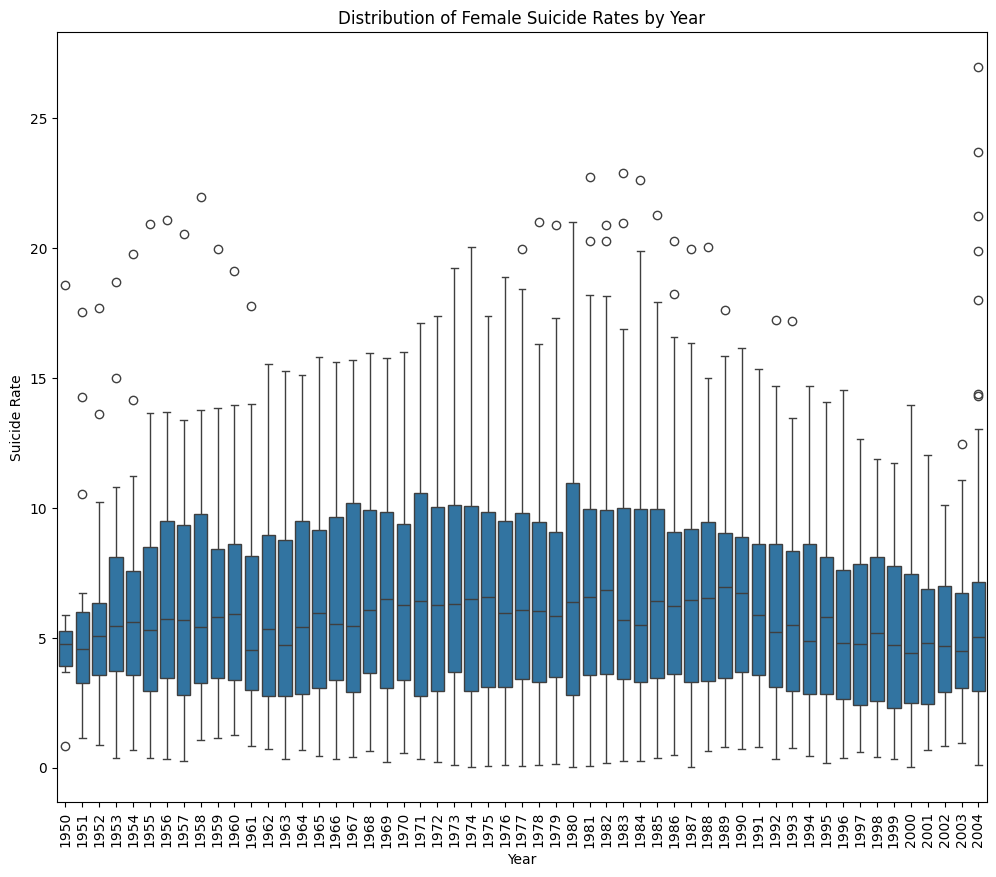

In [11]:
plt.figure(figsize = (12,10))
sns.boxplot(x='Year', y='Female suicide rate (WHO (2005))', data=female_suicide_rates)
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Distribution of Female Suicide Rates by Year')
plt.xticks(rotation=90)
plt.show()

### Trend in female suicide rates across the years

<ipython-input-12-04267745166a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  female_suicide_rates_by_year = female_suicide_rates.groupby('Year').mean()


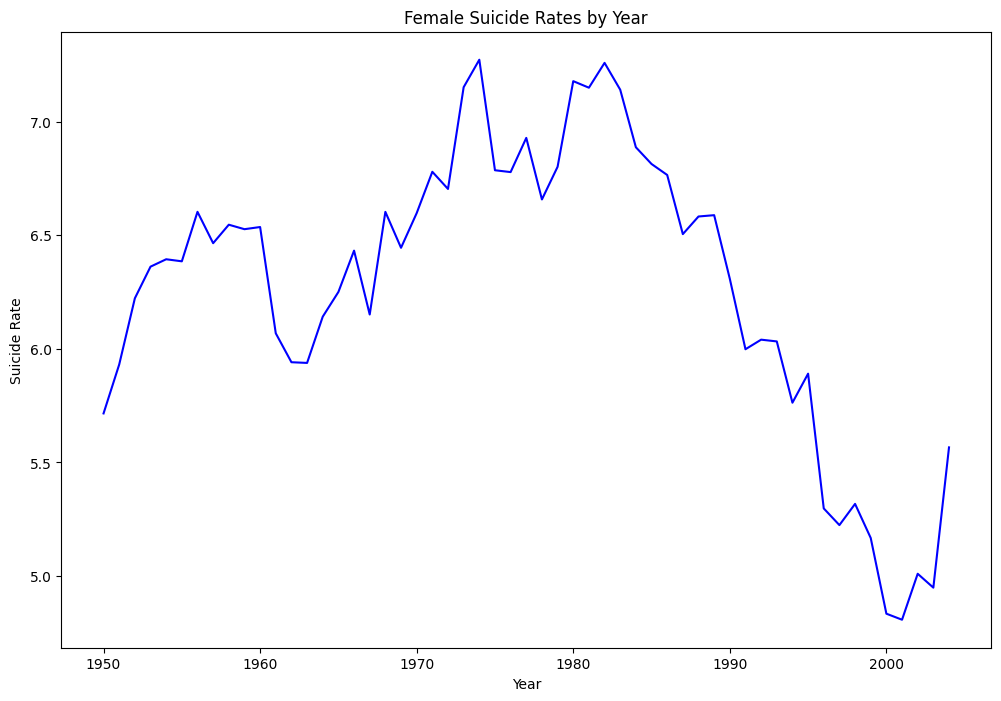

In [12]:
# Group data by year and calculate mean female suicide rates
female_suicide_rates_by_year = female_suicide_rates.groupby('Year').mean()

# Plot line graph
plt.figure(figsize=(12, 8))
female_suicide_rates_by_year['Female suicide rate (WHO (2005))'].plot(kind='line', color = 'blue')
plt.title('Female Suicide Rates by Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
#plt.tight_layout()
plt.show()

### Years with the highest female suicide rates

In [13]:
# Sort the data by mean female suicide rates in descending order
female_suicide_rates_by_year_sorted = female_suicide_rates_by_year.sort_values(by='Female suicide rate (WHO (2005))', ascending=False)

# Get the top 10 years with the highest female suicide rates
top_10_highest = female_suicide_rates_by_year_sorted.head(10)

# print the results
print("Top 10 years with the highest female suicide rates:")
print(top_10_highest)

Top 10 years with the highest female suicide rates:
      Female suicide rate (WHO (2005))
Year                                  
1974                          7.272507
1982                          7.258665
1980                          7.178175
1973                          7.151515
1981                          7.149359
1983                          7.140494
1977                          6.928456
1984                          6.887218
1985                          6.813580
1979                          6.801265


### Years with the lowest female suicide rates

In [14]:
# Sort the data by mean female suicide rates in ascending order
female_suicide_rates_by_year_sorted = female_suicide_rates_by_year.sort_values(by='Female suicide rate (WHO (2005))', ascending=True)

# Get the top 10 years with the lowest suicide rates
top_10_lowest = female_suicide_rates_by_year_sorted.head(10)

# print the results
print("Top 10 years with the lowest female suicide rates:")
print(top_10_lowest)

Top 10 years with the lowest female suicide rates:
      Female suicide rate (WHO (2005))
Year                                  
2001                          4.807660
2000                          4.834220
2003                          4.948839
2002                          5.009908
1999                          5.167483
1997                          5.224144
1996                          5.297519
1998                          5.317515
2004                          5.566234
1950                          5.715680


### Countries with the highest female suicide rates

In [15]:
# Group data by country and calculate mean female suicide rates
female_suicide_rates_by_country = female_suicide_rates.groupby(['Entity'])['Female suicide rate (WHO (2005))'].mean().reset_index()

# Sort the data by mean female suicide rates in descending order
sorted_female_suicide_rates_by_country = female_suicide_rates_by_country.sort_values(by='Female suicide rate (WHO (2005))', ascending=False)

# Select the top countries with the highest mean female suicide rates
highest_female_suicide_rates_by_country = sorted_female_suicide_rates_by_country.head(10)

# Display the top countries
print(highest_female_suicide_rates_by_country)

           Entity  Female suicide rate (WHO (2005))
157       Somalia                         26.972969
91           Laos                         23.723370
72         Guyana                         21.247286
103      Maldives                         19.889219
34          China                         18.021471
75        Hungary                         15.460148
51   East Germany                         15.067797
12     Bangladesh                         14.392731
77          India                         14.306442
85          Japan                         13.125696


### Male vs. female suicide rates in countries with the highest female suicide rates

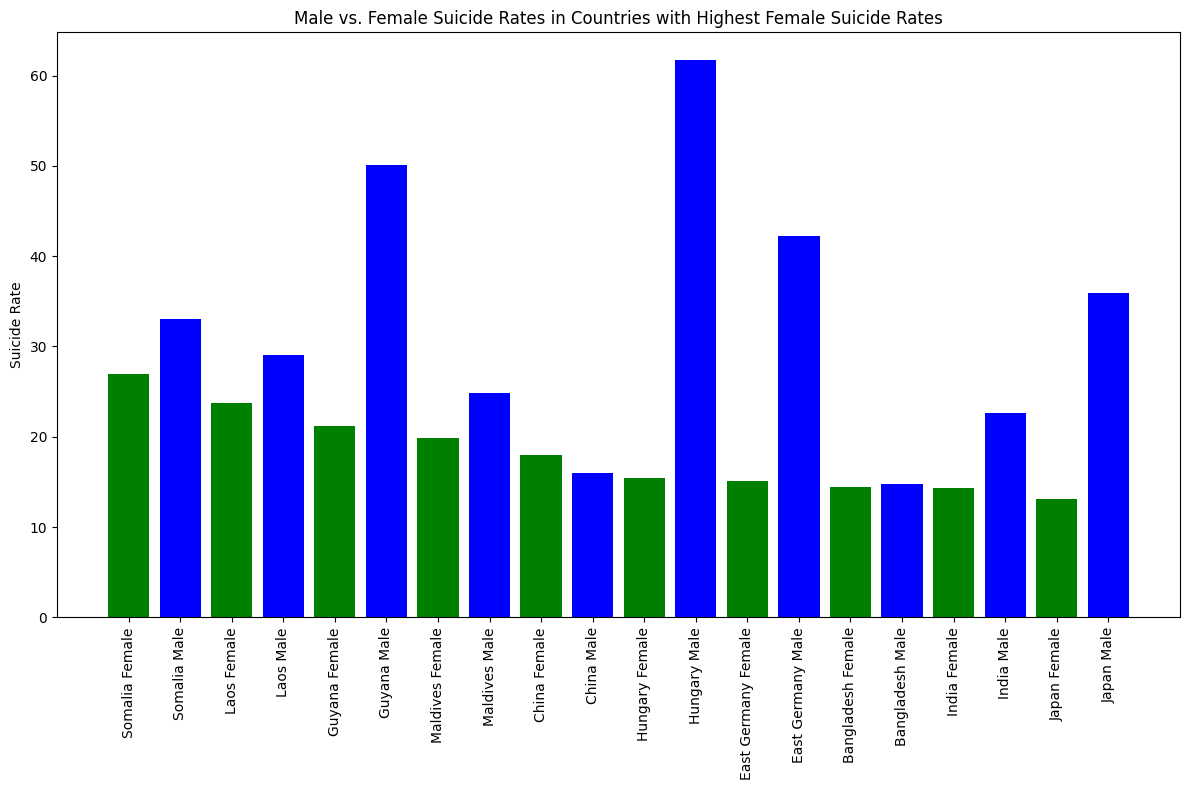

In [16]:
# Merge highest female suicide rates with male suicide rates
merged_rates = pd.merge(highest_female_suicide_rates_by_country, male_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Highest Female Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Countries with the lowest female suicide rates

In [17]:
# Sort the data by mean female suicide rates in ascending order
sorted_female_suicide_rates_by_country = female_suicide_rates_by_country.sort_values(by='Female suicide rate (WHO (2005))', ascending=True)

# Select the top countries with the lowest mean female suicide rates
lowest_female_suicide_rates_by_country = sorted_female_suicide_rates_by_country.head(10)

# Display the top countries
print(lowest_female_suicide_rates_by_country)

                   Entity  Female suicide rate (WHO (2005))
86                 Jordan                          0.107824
151            Seychelles                          0.181349
53                  Egypt                          0.231432
182  United Arab Emirates                          0.274215
43                 Cyprus                          0.275474
68                Grenada                          0.343973
23                 Brunei                          0.375145
167                 Syria                          0.446933
128                  Oman                          0.510550
13               Barbados                          0.706948


### Male vs. female suicide rates in countries with the lowest female suicide rates

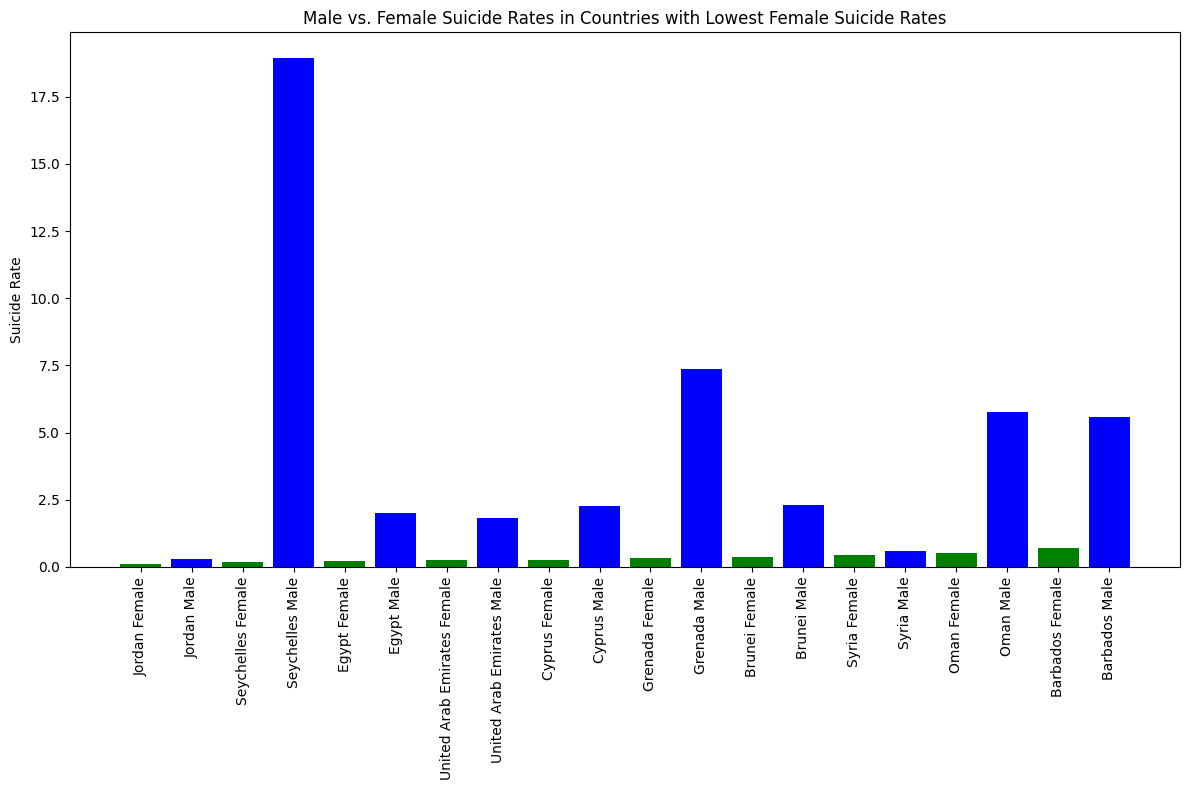

In [18]:
# Merge lowest female suicide rates with male suicide rates
merged_rates = pd.merge(lowest_female_suicide_rates_by_country, male_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Lowest Female Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Male suicide rates

In [19]:
# preview first 10 columns
male_suicide_rates.head(10)

,Entity,Year,"Male suicide rates for selected countries, 1950-2005 (WHO (2005))",Male suicide rate (WHO (2005))
0,Afghanistan,2004,4.884804,4.884804
1,Albania,2004,9.330574,9.330574
2,Algeria,2004,5.145025,5.145025
3,Andorra,2004,8.048293,8.048293
4,Angola,2004,21.472977,21.472977
5,Antigua and Barbuda,2004,4.430495,4.430495
6,Argentina,1966,12.203960,12.203960
7,Argentina,1967,15.552110,15.552110
8,Argentina,1968,16.782040,16.782040
9,Argentina,1969,16.776400,16.776400


In [20]:
# preview last 10 columns
male_suicide_rates.tail(10)

,Entity,Year,"Male suicide rates for selected countries, 1950-2005 (WHO (2005))",Male suicide rate (WHO (2005))
2498,Yugoslavia,1983,NaN,22.675980
2499,Yugoslavia,1984,NaN,23.241420
2500,Yugoslavia,1985,NaN,22.533320
2501,Yugoslavia,1986,NaN,22.323800
2502,Yugoslavia,1987,NaN,23.335500
2503,Yugoslavia,1988,NaN,22.127810
2504,Yugoslavia,1989,NaN,22.416100
2505,Yugoslavia,1990,NaN,20.807000
2506,Zambia,2004,NaN,16.536091
2507,Zimbabwe,2004,NaN,18.836018


In [21]:
# check column features
male_suicide_rates.columns

Index(['Entity', 'Year',
       'Male suicide rates for selected countries, 1950-2005 (WHO (2005))',
       'Male suicide rate (WHO (2005))'],
      dtype='object')

In [22]:
# concise summary of the dataset
male_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             2508 non-null   object 
 1   Year                                                               2508 non-null   int64  
 2   Male suicide rates for selected countries, 1950-2005 (WHO (2005))  997 non-null    float64
 3   Male suicide rate (WHO (2005))                                     2508 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 78.5+ KB


In [23]:
# check for total missing values in each column
male_suicide_rates.isna().sum()

Entity                                                                  0
Year                                                                    0
Male suicide rates for selected countries, 1950-2005 (WHO (2005))    1511
Male suicide rate (WHO (2005))                                          0
dtype: int64

In [24]:
# Drop the columns with missing values
male_suicide_rates = male_suicide_rates.drop(columns=['Male suicide rates for selected countries, 1950-2005 (WHO (2005))'])
male_suicide_rates

,Entity,Year,Male suicide rate (WHO (2005))
0,Afghanistan,2004,4.884804
1,Albania,2004,9.330574
2,Algeria,2004,5.145025
3,Andorra,2004,8.048293
4,Angola,2004,21.472977
...,...,...,...
2503,Yugoslavia,1988,22.127810
2504,Yugoslavia,1989,22.416100
2505,Yugoslavia,1990,20.807000
2506,Zambia,2004,16.536091


In [25]:
# summary statistics of the dataset
male_suicide_rates.drop('Year', axis=1).describe()

,Male suicide rate (WHO (2005))
count,2508.000000
mean,19.158030
std,13.080886
min,0.060753
25%,9.938294
50%,16.899670
75%,24.945327
max,80.428940


### Distribution of male suicide rates across the years

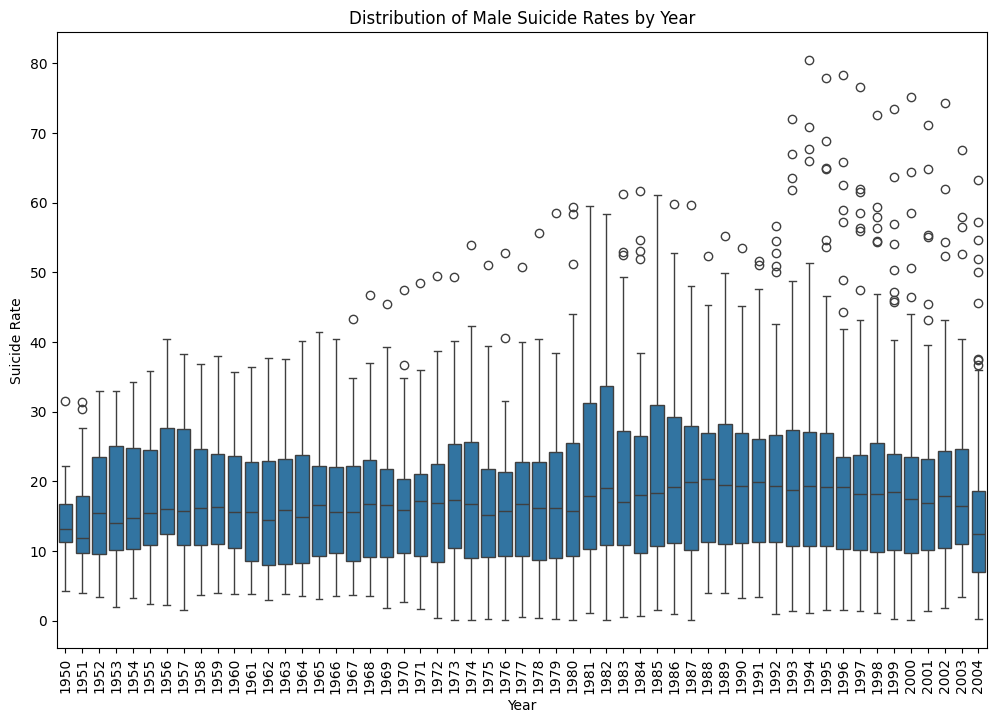

In [26]:
plt.figure(figsize = (12,8))
sns.boxplot(x='Year', y='Male suicide rate (WHO (2005))', data=male_suicide_rates)
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Distribution of Male Suicide Rates by Year')
plt.xticks(rotation=90)
plt.show()

### Trend in male suicide rates across the years

<ipython-input-27-3edc73f363fb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male_suicide_rates_by_year = male_suicide_rates.groupby('Year').mean()


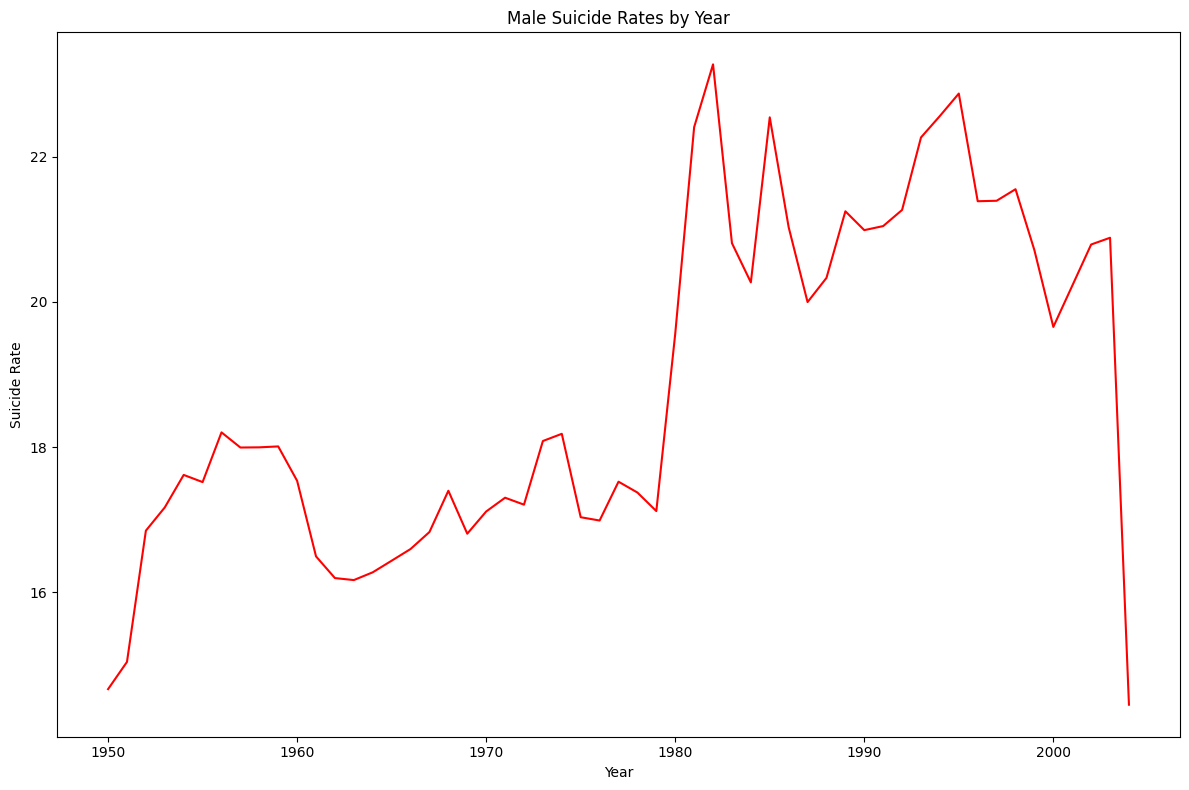

In [27]:
# Group data by year and calculate mean male suicide rates
male_suicide_rates_by_year = male_suicide_rates.groupby('Year').mean()

# Plot line graph
plt.figure(figsize=(12, 8))
male_suicide_rates_by_year['Male suicide rate (WHO (2005))'].plot(kind='line', color = 'red')
plt.title('Male Suicide Rates by Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.tight_layout()
plt.show()

### Years with the highest male suicide rates

In [28]:
# Sort the data by mean male suicide rates in descending order
male_suicide_rates_by_year_sorted = male_suicide_rates_by_year.sort_values(by='Male suicide rate (WHO (2005))', ascending=False)

# Get the top 10 years with the highest male suicide rates
top_10_highest = male_suicide_rates_by_year_sorted.head(10)

# print the results
print("Top 10 years with the highest male suicide rates:")
print(top_10_highest)

Top 10 years with the highest male suicide rates:
      Male suicide rate (WHO (2005))
Year                                
1982                       23.269213
1995                       22.867205
1994                       22.558568
1985                       22.539587
1981                       22.403925
1993                       22.263061
1998                       21.550285
1997                       21.391201
1996                       21.384684
1992                       21.264800


### Years with the lowest male suicide rates

In [29]:
# Sort the data by mean male suicide rates in ascending order
male_suicide_rates_by_year_sorted = male_suicide_rates_by_year.sort_values(by='Male suicide rate (WHO (2005))', ascending=True)

# Get the top 10 years with the lowest suicide rates
top_10_lowest = male_suicide_rates_by_year_sorted.head(10)

# print the results
print("Top 10 years with the lowest male suicide rates:")
print(top_10_lowest)

Top 10 years with the lowest male suicide rates:
      Male suicide rate (WHO (2005))
Year                                
2004                       14.453107
1950                       14.667237
1951                       15.042206
1963                       16.168954
1962                       16.196443
1964                       16.276015
1965                       16.435765
1961                       16.494860
1966                       16.596561
1969                       16.807367


### Countries with the highest male suicide rates

In [30]:
# Group data by country and calculate mean male suicide rates
male_suicide_rates_by_country = male_suicide_rates.groupby(['Entity'])['Male suicide rate (WHO (2005))'].mean().reset_index()

# Sort the data by mean male suicide rates in descending order
sorted_male_suicide_rates_by_country = male_suicide_rates_by_country.sort_values(by='Male suicide rate (WHO (2005))', ascending=False)

# Select the top countries with the highest mean male suicide rates
highest_male_suicide_rates_by_country = sorted_male_suicide_rates_by_country.head(10)

# Display the top countries
print(highest_male_suicide_rates_by_country)

         Entity  Male suicide rate (WHO (2005))
98    Lithuania                       62.980662
140      Russia                       55.434513
73       Guyana                       50.072697
58      Estonia                       49.313028
93       Latvia                       48.927518
76      Hungary                       46.718326
15      Belarus                       46.234002
88   Kazakhstan                       44.463585
155    Slovenia                       42.190554
179        USSR                       39.655779


### Male vs. female suicide rates in countries with the highest male suicide rates

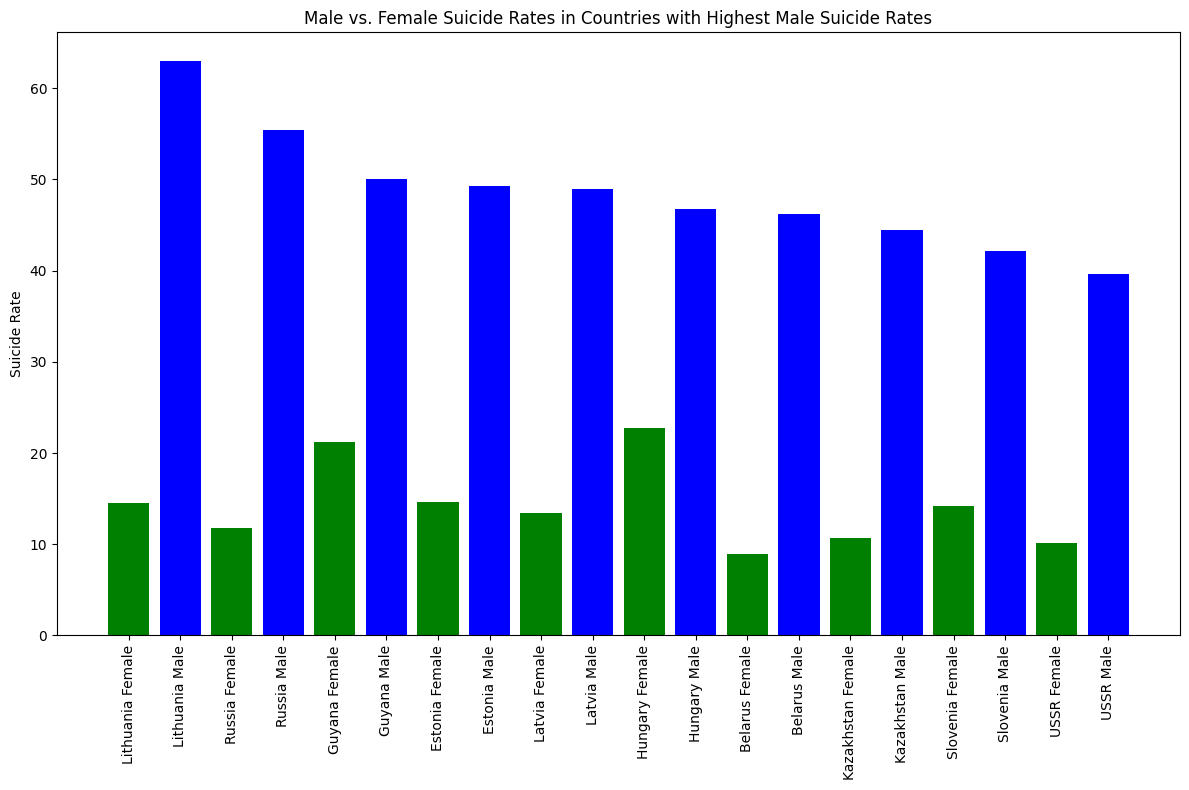

In [31]:
# Merge highest female suicide rates with male suicide rates
merged_rates = pd.merge(highest_male_suicide_rates_by_country, female_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Highest Male Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Countries with the lowest male suicide rates

In [32]:
# Sort the data by mean male suicide rates in ascending order
sorted_male_suicide_rates_by_country = male_suicide_rates_by_country.sort_values(by='Male suicide rate (WHO (2005))', ascending=True)

# Select the top countries with the lowest mean male suicide rates
lowest_male_suicide_rates_by_country = sorted_male_suicide_rates_by_country.head(10)

# Display the top countries
print(lowest_male_suicide_rates_by_country)

                   Entity  Male suicide rate (WHO (2005))
87                 Jordan                        0.283630
54                  Egypt                        0.356142
167                 Syria                        0.597566
90                 Kuwait                        1.095298
44                 Cyprus                        1.169135
182  United Arab Emirates                        1.806055
74                  Haiti                        2.085222
115               Morocco                        2.114464
134                  Peru                        2.261821
24                 Brunei                        2.314273


### Male vs. female suicide rates in countries with the lowest male suicide rates

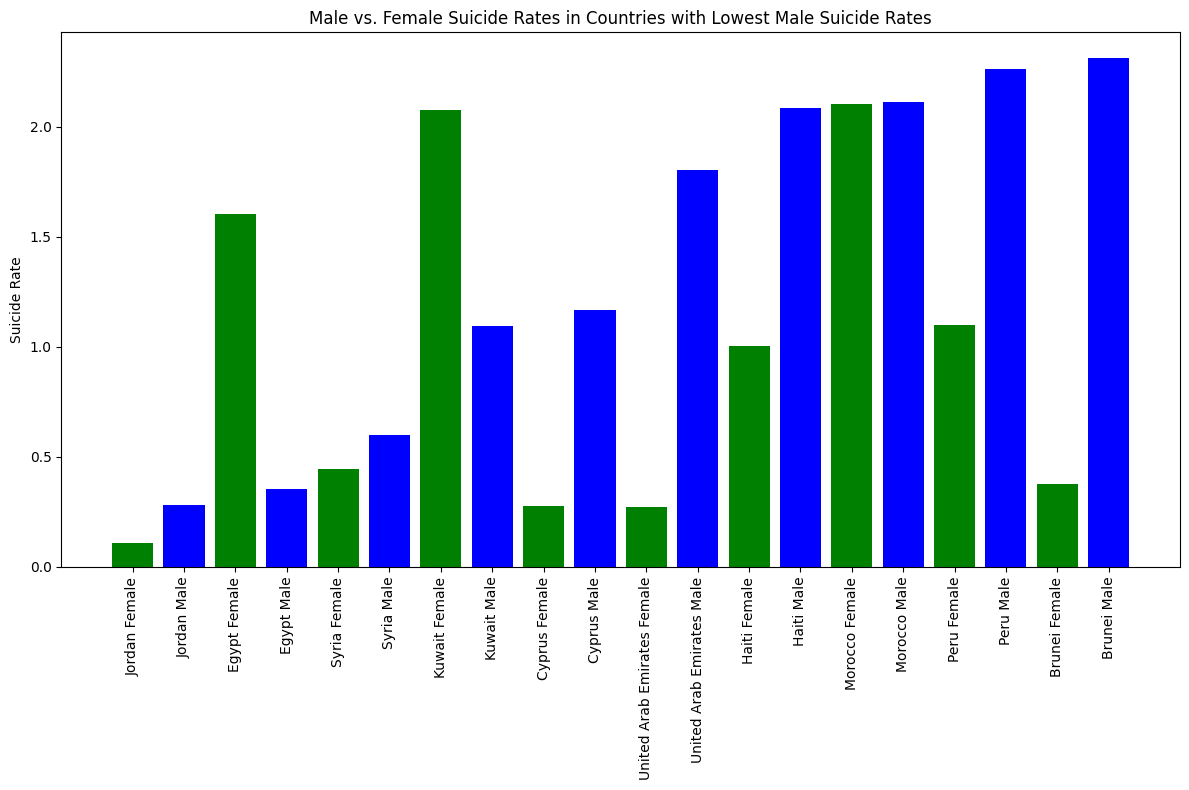

In [33]:
# Merge lowest male suicide rates with female suicide rates
merged_rates = pd.merge(lowest_male_suicide_rates_by_country, female_suicide_rates, on='Entity', suffixes=('_female', '_male'))

# Plotting
plt.figure(figsize=(12, 8))
for index, row in merged_rates.iterrows():
    plt.bar([row['Entity'] + ' Female', row['Entity'] + ' Male'], [row['Female suicide rate (WHO (2005))'], row['Male suicide rate (WHO (2005))']], color=['green', 'blue'])

plt.title('Male vs. Female Suicide Rates in Countries with Lowest Male Suicide Rates')
plt.ylabel('Suicide Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Merge the two datasets

In [34]:
# Merge the two datasets
suicide_rates = pd.merge(female_suicide_rates, male_suicide_rates, on=['Entity', 'Year'])
suicide_rates

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156,4.884804
1,Albania,2004,6.060875,9.330574
2,Algeria,2004,4.600765,5.145025
3,Andorra,2004,2.902797,8.048293
4,Angola,2004,8.143820,21.472977
...,...,...,...,...
2497,Yugoslavia,1988,8.753218,22.127810
2498,Yugoslavia,1989,8.518538,22.416100
2499,Yugoslavia,1990,7.793037,20.807000
2500,Zambia,2004,7.959891,16.536091


In [35]:
# preview first 10 columns
suicide_rates.head(10)

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
0,Afghanistan,2004,8.630156,4.884804
1,Albania,2004,6.060875,9.330574
2,Algeria,2004,4.600765,5.145025
3,Andorra,2004,2.902797,8.048293
4,Angola,2004,8.143820,21.472977
5,Argentina,1966,3.773803,12.203960
6,Argentina,1967,4.522207,15.552110
7,Argentina,1968,4.950262,16.782040
8,Argentina,1969,4.472790,16.776400
9,Argentina,1970,5.086274,16.044990


In [36]:
# preview last 10 columns
suicide_rates.tail(10)

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005))
2492,Yugoslavia,1983,8.625981,22.675980
2493,Yugoslavia,1984,8.548234,23.241420
2494,Yugoslavia,1985,8.234728,22.533320
2495,Yugoslavia,1986,8.317180,22.323800
2496,Yugoslavia,1987,9.230215,23.335500
2497,Yugoslavia,1988,8.753218,22.127810
2498,Yugoslavia,1989,8.518538,22.416100
2499,Yugoslavia,1990,7.793037,20.807000
2500,Zambia,2004,7.959891,16.536091
2501,Zimbabwe,2004,9.376059,18.836018


In [37]:
# Add column for total suicide rates
suicide_rates['Total rate'] = suicide_rates['Female suicide rate (WHO (2005))'] + suicide_rates['Male suicide rate (WHO (2005))']


In [38]:
# check column features
suicide_rates.columns

Index(['Entity', 'Year', 'Female suicide rate (WHO (2005))',
       'Male suicide rate (WHO (2005))', 'Total rate'],
      dtype='object')

In [39]:
#preview first 10 columns
suicide_rates.head(10)

,Entity,Year,Female suicide rate (WHO (2005)),Male suicide rate (WHO (2005)),Total rate
0,Afghanistan,2004,8.630156,4.884804,13.514959
1,Albania,2004,6.060875,9.330574,15.391449
2,Algeria,2004,4.600765,5.145025,9.745790
3,Andorra,2004,2.902797,8.048293,10.951090
4,Angola,2004,8.143820,21.472977,29.616796
5,Argentina,1966,3.773803,12.203960,15.977763
6,Argentina,1967,4.522207,15.552110,20.074317
7,Argentina,1968,4.950262,16.782040,21.732302
8,Argentina,1969,4.472790,16.776400,21.249190
9,Argentina,1970,5.086274,16.044990,21.131264


<ipython-input-40-e6a1dafb92c4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suicide_rates_by_year = suicide_rates.groupby('Year').mean()


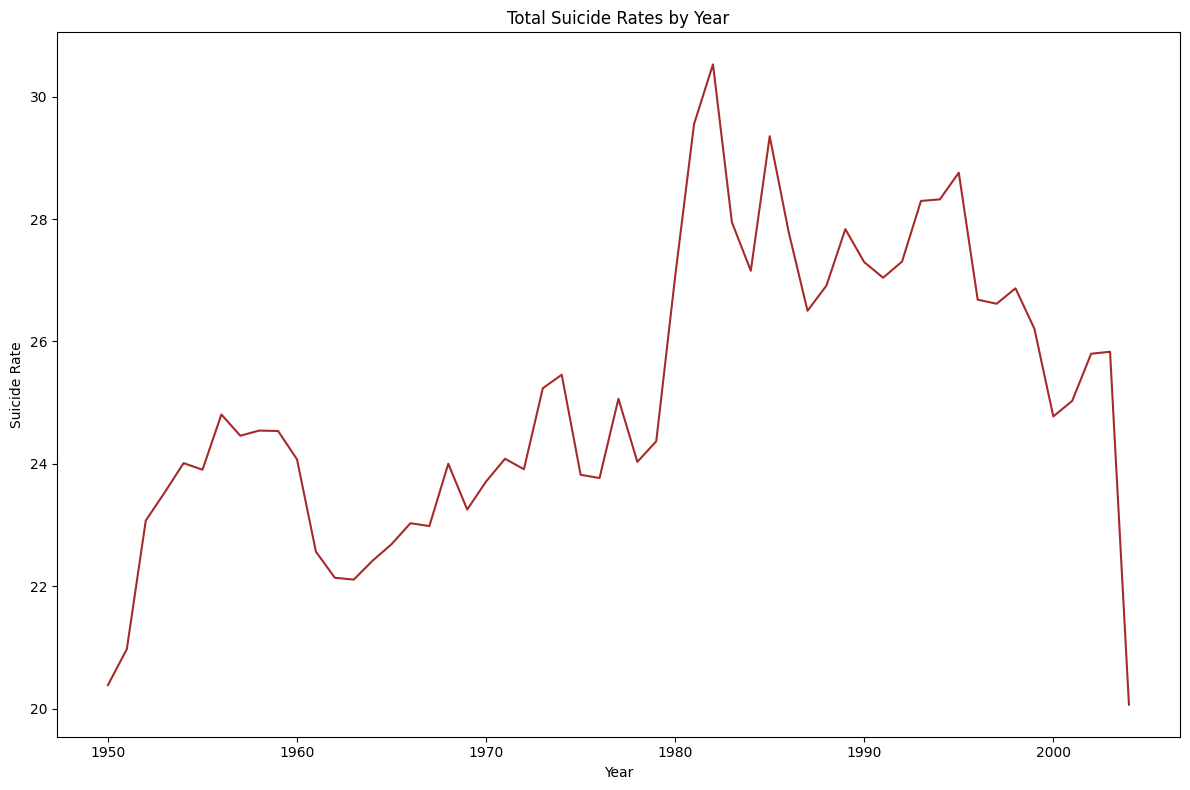

In [40]:
# Group data by year and calculate mean suicide rates
suicide_rates_by_year = suicide_rates.groupby('Year').mean()

# Plot line graph
plt.figure(figsize=(12, 8))
suicide_rates_by_year['Total rate'].plot(kind='line', color = 'brown')
plt.title('Total Suicide Rates by Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.tight_layout()
plt.show()

### Years with the highest total suicide rates

In [41]:
# Sort the data by mean suicide rates in descending order
suicide_rates_by_year_sorted = suicide_rates_by_year.sort_values(by='Total rate', ascending=False)

# Get the top 10 years with the highest suicide rates
top_10_highest = suicide_rates_by_year_sorted.head(10)

# print the results
print("Top 10 years with the highest suicide rates:")
print(top_10_highest)

Top 10 years with the highest suicide rates:
      Female suicide rate (WHO (2005))  Male suicide rate (WHO (2005))  \
Year                                                                     
1982                          7.258665                       23.269213   
1981                          7.149359                       22.403925   
1985                          6.813580                       22.539587   
1995                          5.890656                       22.867205   
1994                          5.762872                       22.558568   
1993                          6.032607                       22.263061   
1983                          7.140494                       20.807834   
1989                          6.588261                       21.246260   
1986                          6.765247                       21.027157   
1992                          6.040338                       21.264800   

      Total rate  
Year              
1982   30.527877  
1981   29

### Years with the lowest total suicide rates

In [42]:
# Sort the data by mean suicide rates in ascending order
suicide_rates_by_year_sorted = suicide_rates_by_year.sort_values(by='Total rate', ascending=True)

# Get the top 10 years with the lowest suicide rates
top_10_lowest_total = suicide_rates_by_year_sorted.head(10)

# print the results
print("Top 10 years with the lowest suicide rates:")
print(top_10_lowest_total)

Top 10 years with the lowest suicide rates:
      Female suicide rate (WHO (2005))  Male suicide rate (WHO (2005))  \
Year                                                                     
2004                          5.556619                       14.506137   
1950                          5.715680                       14.667237   
1951                          5.931036                       15.042206   
1963                          5.937964                       16.168954   
1962                          5.941029                       16.196443   
1964                          6.141531                       16.276015   
1961                          6.068364                       16.494860   
1965                          6.250287                       16.435765   
1967                          6.151043                       16.830908   
1966                          6.432199                       16.596561   

      Total rate  
Year              
2004   20.062756  
1950   20.

### Countries with the highest total suicide rates

In [43]:
# Group data by country and calculate mean total suicide rates
suicide_rates_by_country = suicide_rates.groupby(['Entity'])['Total rate'].mean().reset_index()

# Sort the data by mean total suicide rates in descending order
sorted_suicide_rates_by_country = suicide_rates_by_country.sort_values(by='Total rate', ascending=False)

# Select the top countries with the highest total suicide rates
highest_total_suicide_rates_by_country = sorted_suicide_rates_by_country.head(10)

# Display the top countries
print(highest_total_suicide_rates_by_country)

         Entity  Total rate
97    Lithuania   74.156171
72       Guyana   71.319983
139      Russia   65.354681
75      Hungary   62.178473
156     Somalia   60.000477
57      Estonia   59.585289
92       Latvia   59.239560
14      Belarus   53.859661
87   Kazakhstan   53.758896
154    Slovenia   53.166128


### Countries with the lowest total suicide rates

In [44]:
# Sort the data by mean total suicide rates in ascending order
sorted_suicide_rates_by_country = suicide_rates_by_country.sort_values(by='Total rate', ascending=True)

# Select the top countries with the lowest total suicide rates
lowest_total_suicide_rates_by_country = sorted_suicide_rates_by_country.head(10)

# Display the top countries
print(lowest_total_suicide_rates_by_country)

                   Entity  Total rate
86                 Jordan    0.391454
53                  Egypt    0.587574
166                 Syria    1.044499
43                 Cyprus    1.255503
89                 Kuwait    1.998653
181  United Arab Emirates    2.080270
23                 Brunei    2.689418
73                  Haiti    3.090484
134           Philippines    3.338554
133                  Peru    3.362496


## Findings

* Female suicide rates exhibited a consistent decline from the early 1980s to 2004. The peak of female suicide rates occurred in the early 1980s, followed by a notable decrease leading into the mid to late 1990s and the early 2000s, where rates reached their lowest levels.

* Somalia recorded the highest female suicide rate at 26.97 per 100,000 population, while Jordan recorded the lowest rate.

* Male suicide rates far surpassed female rates both in countries where the highest and lowest female suicide rates were recorded, nearly tripling them.

* Male suicide rates experienced a significant increase from 1980 to the early 2000s, followed by a sharp decline.

* Lithuania exhibited the highest male suicide rate at approximately 62.98 per 100,000 population.

* Hungary stood out for having high suicide rates among both men and women. In contrast, Jordan had the lowest suicide rates among both genders.